#### Challenge Set 5
#### Topic:        Classification
#### Date:         05/15/2016
#### Name:         Anne Nguyen

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/home/amn34/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [76]:
import pandas as pd
import numpy as np

In [3]:
congress = pd.read_csv('house-votes-84.data', header = None)

#### Challenge 1

In [4]:
congress = congress.replace({'n':0,'y':1,'?':None})

In [5]:
congress = congress.fillna(congress.mean())

In [6]:
congress.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


#### Challenge 2

In [7]:
from sklearn.cross_validation import train_test_split

In [8]:
X = congress.loc[:,1:17]

In [9]:
y = congress[0]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4444)

#### Challenge 3

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [45]:
kpred = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    pred = knn.predict(X_test)
    print i, 'neighbor(s)', ':', accuracy_score(y_test,pred)
    kpred.append(accuracy_score(y_test,pred))

1 neighbor(s) : 0.909722222222
2 neighbor(s) : 0.902777777778
3 neighbor(s) : 0.902777777778
4 neighbor(s) : 0.902777777778
5 neighbor(s) : 0.916666666667
6 neighbor(s) : 0.930555555556
7 neighbor(s) : 0.909722222222
8 neighbor(s) : 0.923611111111
9 neighbor(s) : 0.923611111111
10 neighbor(s) : 0.930555555556
11 neighbor(s) : 0.923611111111
12 neighbor(s) : 0.923611111111
13 neighbor(s) : 0.923611111111
14 neighbor(s) : 0.923611111111
15 neighbor(s) : 0.923611111111
16 neighbor(s) : 0.923611111111
17 neighbor(s) : 0.916666666667
18 neighbor(s) : 0.916666666667
19 neighbor(s) : 0.916666666667
20 neighbor(s) : 0.916666666667


In [13]:
# 6 and 10 neighbors are best

#### Challenge 4

In [14]:
from sklearn.linear_model import LogisticRegression

In [209]:
logit = LogisticRegression().fit(X_train,y_train)
logitscore = accuracy_score(y_test,logit.predict(X_test))
print 'logit accuracy:', logitscore

logit accuracy: 0.944444444444


#### Challenge 5

In [28]:
y.value_counts()

democrat      267
republican    168
Name: 0, dtype: int64

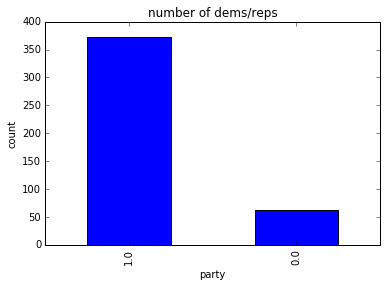

In [178]:
y.value_counts().plot.bar()
plt.title('number of dems/reps')
plt.ylabel('count')
plt.xlabel('party')

In [36]:
def one_type(type, X):
    dpred = [type] * len(X)
    return dpred

In [52]:
rpred = accuracy_score(y_test,one_type('republican',X_test))
dpred = accuracy_score(y_test,one_type('democrat',X_test))

print "rep accuracy score:", rpred
print "dem accuracy score:", dpred

rep accuracy score: 0.388888888889
dem accuracy score: 0.611111111111


#### Challenge 6

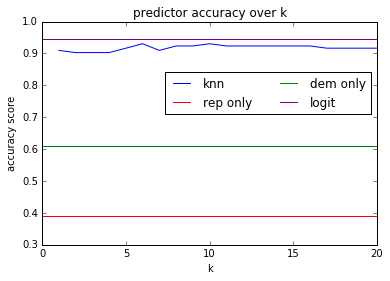

In [130]:
plt.plot(range(1,21),kpred)
plt.axhline(rpred, color='r')
plt.axhline(dpred, color='g')
plt.axhline(logitscore, color='purple')
plt.legend(['knn','rep only','dem only','logit'],ncol=2,bbox_to_anchor=(1, 0.8))
plt.xlabel('k')
plt.ylabel('accuracy score')
plt.title('predictor accuracy over k')

#### Challenge 7

In [72]:
from sklearn.learning_curve import learning_curve

In [114]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X, y,train_sizes=np.linspace(0.1, 1.0))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

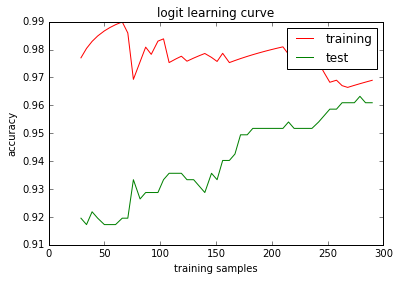

In [283]:
plt.plot(train_sizes, train_scores_mean, color="r")
plt.plot(train_sizes, test_scores_mean, color="g")
plt.legend(['training','test'])
plt.ylabel('accuracy')
plt.xlabel('training samples')
plt.title('logit learning curve')

In [117]:
# knn

In [118]:
ktrain_sizes, ktrain_scores, ktest_scores = learning_curve(KNeighborsClassifier(n_neighbors=6), X, y,train_sizes=np.linspace(0.1, 1.0))
ktrain_scores_mean = np.mean(ktrain_scores, axis=1)
ktest_scores_mean = np.mean(ktest_scores, axis=1)

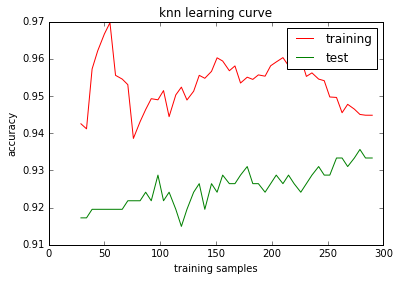

In [284]:
plt.plot(ktrain_sizes, ktrain_scores_mean, color="r")
plt.plot(ktrain_sizes, ktest_scores_mean, color="g")
plt.legend(['training','test'])
plt.ylabel('accuracy')
plt.xlabel('training samples')
plt.title('knn learning curve')

#### Challenge 8

In [120]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [122]:
# Gaussian nb
nbmodel = GaussianNB().fit(X_train,y_train)
print "Gaussian nb score:", accuracy_score(y_test,nbmodel.predict(X_test))

Gaussian nb score: 0.9375


In [140]:
# SVM
svmodel = SVC().fit(X_train,y_train)
print "SVM score:", accuracy_score(y_test,svmodel.predict(X_test))

SVM score: 0.951388888889


In [124]:
# DT
dtmodel = DecisionTreeClassifier().fit(X_train,y_train)
print "DT score:", accuracy_score(y_test,dtmodel.predict(X_test))

DT score: 0.944444444444


In [125]:
# RF
rfmodel = RandomForestClassifier().fit(X_train,y_train)
print "RF score:", accuracy_score(y_test,rfmodel.predict(X_test))

RF score: 0.951388888889


#### Challenge 9

In [142]:
from sklearn.cross_validation import cross_val_score

cvs = []
for classifier in (logit, knn, nbmodel, svcmodel, dtmodel, rfmodel):
    cvs.append(np.mean(cross_val_score(classifier,X,y)))
classnames = ('Logistic', 'K Nearest Neighbors', 'Gaussian Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Random Forest')
print zip(classnames, cvs)

[('Logistic', 0.96091954022988502), ('K Nearest Neighbors', 0.91724137931034477), ('Gaussian Naive Bayes', 0.93103448275862066), ('Support Vector Machine', 0.95402298850574718), ('Decision Tree', 0.94482758620689655), ('Random Forest', 0.95402298850574707)]


#### Challenge 10

In [151]:
votes = pd.read_csv('house-votes-84.data', header = None)

In [152]:
votes = votes.replace({'n':0,'y':1,'?':None})

In [153]:
votes = votes.fillna(votes.mode().iloc[0])

In [154]:
votes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [156]:
y = votes[16]

In [165]:
X = votes.loc[:,1:15]

In [168]:
vlogit = LogisticRegression().fit(X,y)

In [172]:
print 'logit accuracy for predicting vote #16:', np.mean(cross_val_score(vlogit,X,y))

logit accuracy for predicting vote #16: 0.848223595584


#### Challenge 11

In [175]:
movies = pd.read_csv('/home/amn34/metis/nyc16_ds7/challenges/challenges_data/2013_movies.csv')

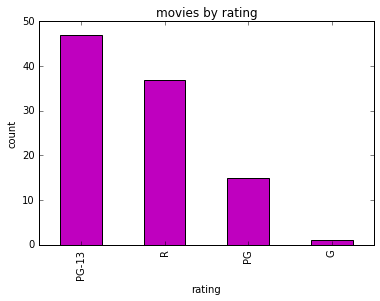

In [181]:
movies.Rating.value_counts().plot.bar(color='mauve')
plt.title('movies by rating')
plt.xlabel('rating')
plt.ylabel('count')

In [202]:
my = movies.Rating

In [196]:
from datetime import datetime

In [198]:
movies.ReleaseDate = pd.to_datetime(movies.ReleaseDate).apply(lambda x: x.toordinal())

In [203]:
mX = movies[['Budget','DomesticTotalGross','Runtime','ReleaseDate']]

In [207]:
mX = mX.fillna(mX.mean())

In [211]:
mX_train, mX_test, my_train, my_test = train_test_split(mX, my, test_size=0.33, random_state=4444)

In [213]:
mlogit = LogisticRegression().fit(mX_train,my_train)
print 'Logit accuracy for predicting movie rating is: ', accuracy_score(my_test,mlogit.predict(mX_test))

Logit accuracy for predicting movie rating is:  0.545454545455


In [215]:
mknn = KNeighborsClassifier().fit(mX_train,my_train)
print 'KNN accuracy for predicting movie rating is: ', accuracy_score(my_test, mknn.predict(mX_test))

KNN accuracy for predicting movie rating is:  0.575757575758


In [223]:
baseline = ['PG-13']*len(mX_test)
print 'mode prediction accuracy is: ', accuracy_score(my_test,baseline)

mode prediction accuracy is:  0.454545454545


In [224]:
# logit and knn do about the same, and they both do about 10% better than always predicting PG-13

In [227]:
print zip(mX.columns, mlogit.coef_)

[('Budget', array([ -1.46337794e-07,   5.98293957e-08,  -2.32678125e-09,
        -9.42945820e-06])), ('DomesticTotalGross', array([  1.38193510e-08,   3.08124665e-09,  -1.10348801e-09,
        -5.14766514e-06])), ('Runtime', array([  1.00076959e-08,  -2.47182882e-09,  -4.68803312e-11,
        -7.46206997e-07])), ('ReleaseDate', array([ -2.10315689e-08,  -1.26964050e-09,   2.27419002e-10,
         1.45048751e-06]))]


In [230]:
y.unique()

array(['PG-13', 'PG', 'G', 'R'], dtype=object)

In [ ]:
# hard to interpret these coefficients without r-squared or other measures of model fit but theoretically at least
# higher budget increases the likelihood that a movie will be PG. the larger a budget, the more likely it is that the
# movie is PG-13 or PG. longer runtimes decrease the likelihood that a movie will be anything but PG, and the more 
# recently a movie was made, the more likely it is to be G or R. these effects are all quite small though.

#### Challenge 12

In [271]:
bc = pd.read_csv('/home/amn34/metis/nyc16_ds7/challenges/challenges_data/haberman.data',header=None)

In [272]:
bc.columns = ['age','year','nodes','survival']

In [236]:
bc.head()

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [237]:
print 'Average age of patients is: ', bc.age.mean()

Average age of patients is:  52.4575163399


In [238]:
print 'Std of patient age is: ', bc.age.std()

Std of patient age is:  10.8034523493


In [241]:
bc.groupby('survival').mean()

,age,year,nodes
survival,,,
1,52.017778,62.862222,2.791111
2,53.679012,62.827160,7.456790


In [242]:
bc.groupby('survival').std()

,age,year,nodes
survival,,,
1,11.012154,3.222915,5.870318
2,10.167137,3.342118,9.185654


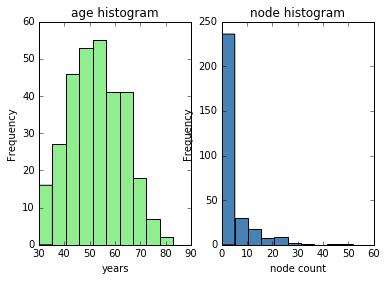

In [252]:
ax1 = plt.subplot(121)
bc.age.plot.hist(color = 'lightgreen')
plt.title('age histogram')
plt.xlabel('years')
ax2 = plt.subplot(122)
bc.nodes.plot.hist(color = 'steelblue')
plt.title('node histogram')
plt.xlabel('node count')

In [255]:
print 'earliest surgery date is: ', bc.year.min()
print 'latest surgery date is: ', bc.year.max()

earliest surgery date is:  58
latest surgery date is:  69


In [273]:
bc.survival = bc.survival.replace(2,0)

In [274]:
bcy = bc.survival

In [275]:
bcX = bc.drop('survival', axis=1)

In [276]:
bcX_train, bcX_test, bcy_train, bcy_test = train_test_split(bcX, bcy, test_size=0.33, random_state=4444)

In [277]:
bclogit = LogisticRegression().fit(bcX_train,bcy_train)
print accuracy_score(bcy_test,bclogit.predict(bcX_test))

0.792079207921


In [278]:
print zip(bcX.columns, bclogit.coef_.flatten())

[('age', -0.012534897631823728), ('year', 0.028379845547599699), ('nodes', -0.071085736599657973)]


In [279]:
# patients were a bit more likely to survive when they were younger, had the surgery later, and had fewer nodes

In [280]:
bctrain_sizes, bctrain_scores, bctest_scores = learning_curve(LogisticRegression(), bcX, bcy,train_sizes=np.linspace(0.1, 1.0))
bctrain_scores_mean = np.mean(bctrain_scores, axis=1)
bctest_scores_mean = np.mean(bctest_scores, axis=1)

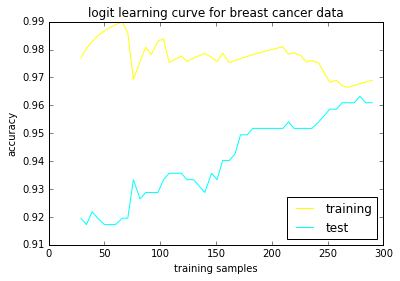

In [286]:
plt.plot(train_sizes, train_scores_mean, color="yellow")
plt.plot(train_sizes, test_scores_mean, color="cyan")
plt.legend(['training','test'],loc='best')
plt.ylabel('accuracy')
plt.xlabel('training samples')
plt.title('logit learning curve for breast cancer data')